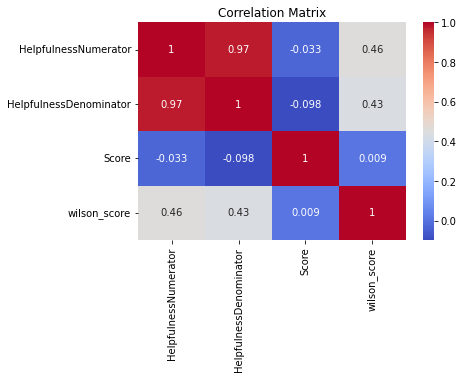

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

def wilson_lower_bound(helpful_votes, total_votes, confidence=0.95):
    """
    Calculate the lower bound of Wilson Score Interval.
    
    helpful_votes: int, number of helpful votes (helpfulnessNominator)
    total_votes: int, total number of votes (helpfulnessDenominator)
    confidence: float, the desired confidence level (default: 0.95)
    
    Returns the lower bound of Wilson Score Interval as a float.
    """
    if total_votes == 0:
        return 0
    z = 1.96  # z-score for 95% confidence interval
    phat = float(helpful_votes) / total_votes
    inner_sqrt = (phat * (1 - phat) + z**2 / (4 * total_votes)) / total_votes
    if inner_sqrt < 0:
        inner_sqrt = 0  # Prevent math domain error
    denominator = 1 + z**2/total_votes
    numerator = phat + z**2 / (2 * total_votes) - z * sqrt(inner_sqrt)
    return numerator / denominator

# Read the dataset into a pandas DataFrame
df = pd.read_csv('Reviews.csv')

# Calculate wilson_score and add it as a new column
df['wilson_score'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['HelpfulnessDenominator']), axis=1)

# Calculate correlation matrix including wilson_score
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'wilson_score']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()